In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_1 = ('amazon_cells_labelled.txt')
data_2 = ('yelp_labelled.txt')
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

txt_raw.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
positive = (txt_raw['score'] == 1)
txt_raw[positive]

,sentence,score
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue to...,1
17,So Far So Good!.,1
18,Works great!.,1


In [4]:
keywords = ['good', 'great', 'excellent', 'must have', 'love', 'recommend', 'best', 'stylish', 'comfort', 'pleased', 
            'highly', 'definitely', 'amazing', 'well', 'easier', 'like', 'satisfied', 'joy', 'nice', 'loved', 
           'easy', '10', 'fulfills', 'recommended', 'impressed', 'works', 'reasonable', 'well', 'fine']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

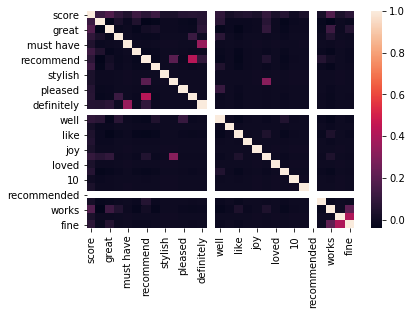

In [5]:
sns.heatmap(txt_raw.corr())

In [6]:
data = txt_raw[keywords]
target = positive

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Accuracy : {}%".format(
    bnb.score(data, target) * 100
))

Number of mislabeled points out of a total 1000 points : 336
Accuracy : 66.4%


#### Run the same model on another dataset (Yelp)

In [8]:
txt_raw2 = pd.read_csv(data_2, delimiter= '\t', header=None)
txt_raw2.columns = ['review', 'score'] # 1 = positive 0 = negative

txt_raw2.head()

,review,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
#use the same keywords to see how this classifier works out of context
keywords2 = ['good', 'great', 'excellent', 'must have', 'love', 'recommend', 'best', 'stylish', 'comfort', 'pleased', 
            'highly', 'definitely', 'amazing', 'well', 'easier', 'like', 'satisfied', 'joy', 'nice', 'loved', 
           'easy', '10', 'fulfills', 'recommended', 'impressed', 'works', 'reasonable', 'well', 'fine']

for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw2[str(key)] = txt_raw2.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [10]:
data2 = txt_raw2[keywords2]
target2 = (txt_raw2['score'] == 1)

In [11]:
# Instantiate our model and store it in a new variable.
bnb2 = BernoulliNB()

# Fit our model to the data.
bnb2.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb2.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

print("Accuracy : {}%".format(
    bnb2.score(data2, target2) * 100
))

Number of mislabeled points out of a total 1000 points : 372
Accuracy : 62.8%


## Adding a confusion matrix for the first dataset

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

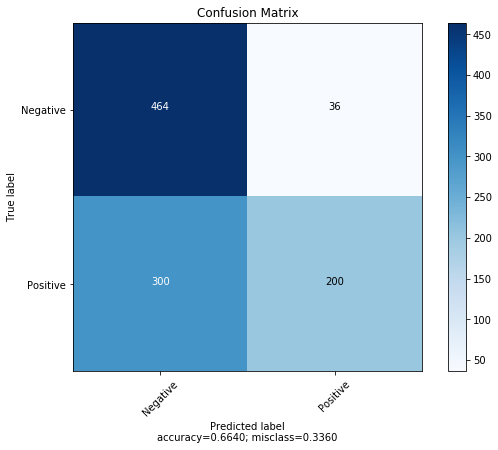

In [19]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm           = confusion_matrix(target, y_pred), 
                      normalize    = False,
                      target_names = ['Negative', 'Positive'],
                      title        = "Confusion Matrix")

In [15]:
confusion_matrix(target, y_pred)

array([[464,  36],
       [300, 200]])

In [16]:
txt_raw['preds'] = y_pred

txt_raw.head()

,sentence,score,good,great,excellent,must have,love,recommend,best,stylish,...,loved,easy,10,fulfills,recommended,impressed,works,reasonable,fine,preds
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Build your confusion matrix and calculate sensitivity and specificity here.

# initialize counts
TP = 0 # Positive review (1) predicted as Positive
TN = 0 # Negative review (0) predicted as Negative
FP = 0 # Negative review (0) predicted as Positive (1)
FN = 0 # Positive review (1) predicted as Negative (0)
    
def manually_calculate_cm(target, y_pred):
    """Manually create confusion matrix by comparing predictions with answers."""
    # Make TP, TN, FP, FN global parameters (access counts outside of function)
    global TP 
    global TN 
    global FP 
    global FN 

    x = 0
    while x < len(target):
        if target[x] == 0 and y_pred[x] == 0:  # Neg predicted as Neg
            TN += 1
        if target[x] == 0 and y_pred[x] == 1:  # Neg predicted as Pos
            FP += 1
        if target[x] == 1 and y_pred[x] == 1:  # Pos predicted as Pos
            TP += 1
        if target[x] == 1 and y_pred[x] == 0:  # Pos predicted as Neg
            FN += 1
        x += 1

    cm = [[TN, FP],[FN, TP]]
    return cm

manually_calculate_cm(target, y_pred)

[[464, 36], [300, 200]]

In [26]:
# Turn manually calculated confusion matrix into a dataframe
counts = manually_calculate_cm(target, y_pred)
df = pd.DataFrame(counts, index=['Negative','Positive'], columns=['Negative', 'Positive'])

# calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

In [27]:
print(df)
print('')
print('Sensitivity: {}'.format(sensitivity))
print('Specificity: {}'.format(specificity))

          Negative  Positive
Negative      1392       108
Positive       900       600

Sensitivity: 0.4
Specificity: 0.928
